In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import databuilder
import numpy as np

db = databuilder.DataBuilder()


Loading ./Resources/COS2019.csv
Successfully loaded data for ./Resources/COS2019.csv
Loading ./Resources/COS2020.csv
Successfully loaded data for ./Resources/COS2020.csv
Loading ./Resources/COS2021.csv
Successfully loaded data for ./Resources/COS2021.csv
Loading ./Resources/COS2022.csv
Successfully loaded data for ./Resources/COS2022.csv
Loading ./Resources/COS2023.csv
Successfully loaded data for ./Resources/COS2023.csv

Successfully combined 5 files
Total records: 1,150,331
Loading ./Resources/full_moons.csv
Successfully loaded data for ./Resources/full_moons.csv

Successfully combined 1 files
Total records: 1,868
Loading ./Resources/merc_retro.csv
Successfully loaded data for ./Resources/merc_retro.csv

Successfully combined 1 files
Total records: 16
Loading ./Resources/Newmoondata.csv
Successfully loaded data for ./Resources/Newmoondata.csv

Successfully combined 1 files
Total records: 62


In [32]:
emergency_df = db.get_emergency_data()
moon_df = db.get_full_moon_data()

moon_df.info()
emergency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Day       1868 non-null   object        
 1   Flag      1868 non-null   object        
 2   DateTime  1868 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 43.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150331 entries, 0 to 1150330
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   INCIDENT  1150331 non-null  int64         
 1   REPORTED  1150331 non-null  datetime64[ns]
 2   CLOSED    1150317 non-null  datetime64[ns]
 3   CATEGORY  1150331 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 35.1+ MB


In [33]:


# Filter for Total Eclipse events
total_eclipse_series = moon_df[moon_df['Flag'] == 'Total Eclipse']

# Filter for dates between 2019 and 2023
total_eclipse_series = total_eclipse_series[
    (total_eclipse_series['DateTime'].dt.year >= 2019) & 
    (total_eclipse_series['DateTime'].dt.year <= 2023)
]

# Group by date and count accidents per day
daily_accidents = emergency_df.groupby(
    emergency_df['REPORTED'].dt.date
).size().reset_index(name="COUNT")
display(daily_accidents.head())


,REPORTED,COUNT
0,2019-01-01,555
1,2019-01-02,621
2,2019-01-03,566
3,2019-01-04,613
4,2019-01-05,538


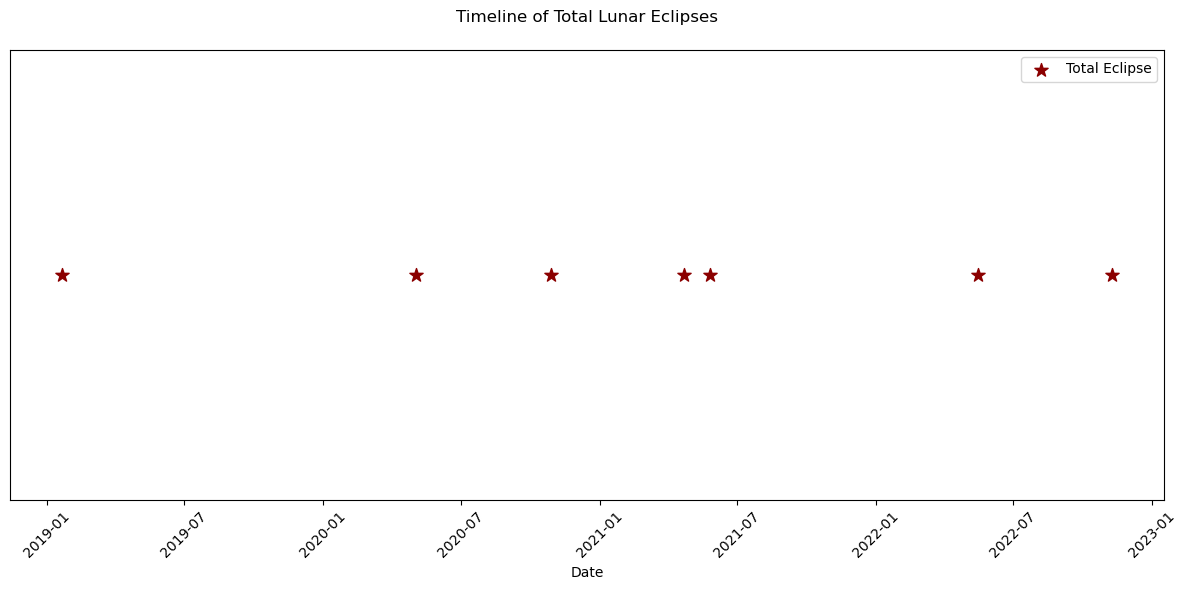

In [34]:
# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the total eclipse events
plt.scatter(total_eclipse_series['DateTime'], 
           [1] * len(total_eclipse_series),
           marker='*', 
           s=100,
           color='darkred',
           label='Total Eclipse')

# Customize the plot
plt.title('Timeline of Total Lunar Eclipses', pad=20)
plt.xlabel('Date')
plt.yticks([])  # Hide y-axis ticks since we're just showing events

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


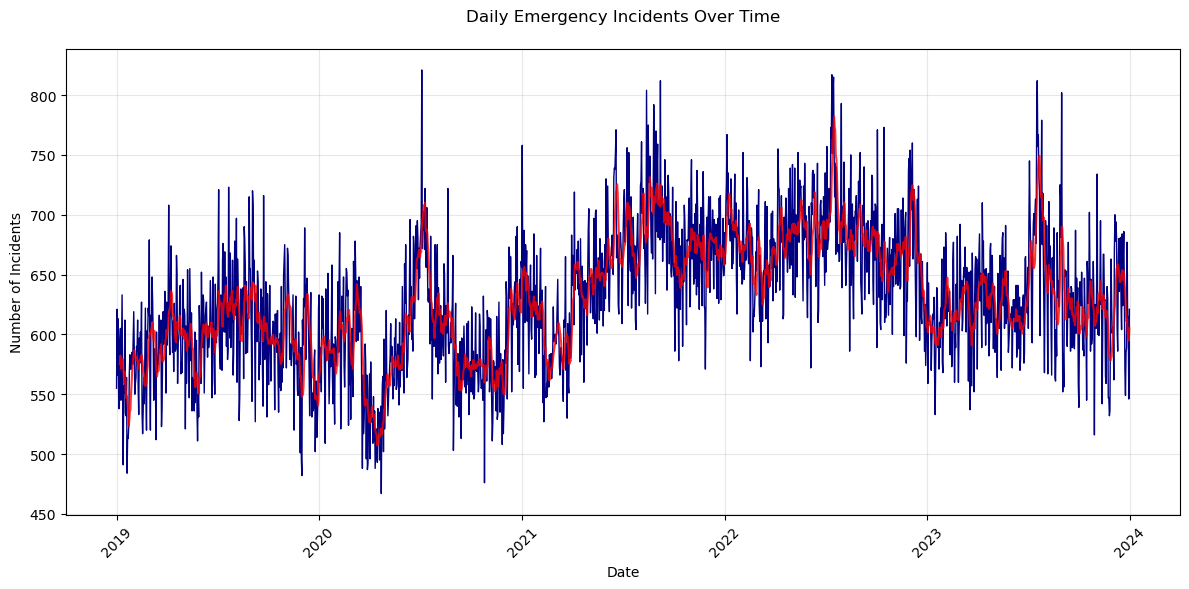

In [35]:
# Create a figure and axis
plt.figure(figsize=(12, 6))

daily_accidents["7-day-window"] = daily_accidents["COUNT"].rolling(window=7).mean()

# Create the line plot
plt.plot(daily_accidents["REPORTED"], 
         daily_accidents["COUNT"],
         linewidth=1,
         color='navy')
# Plot the 7-day rolling average
plt.plot(daily_accidents['REPORTED'],
         daily_accidents["7-day-window"],
         linewidth=1.5,
         color='red',
         alpha=0.8,
         label='7-day Rolling Average')


# Customize the plot
plt.title('Daily Emergency Incidents Over Time', pad=20)
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for easier reading
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()



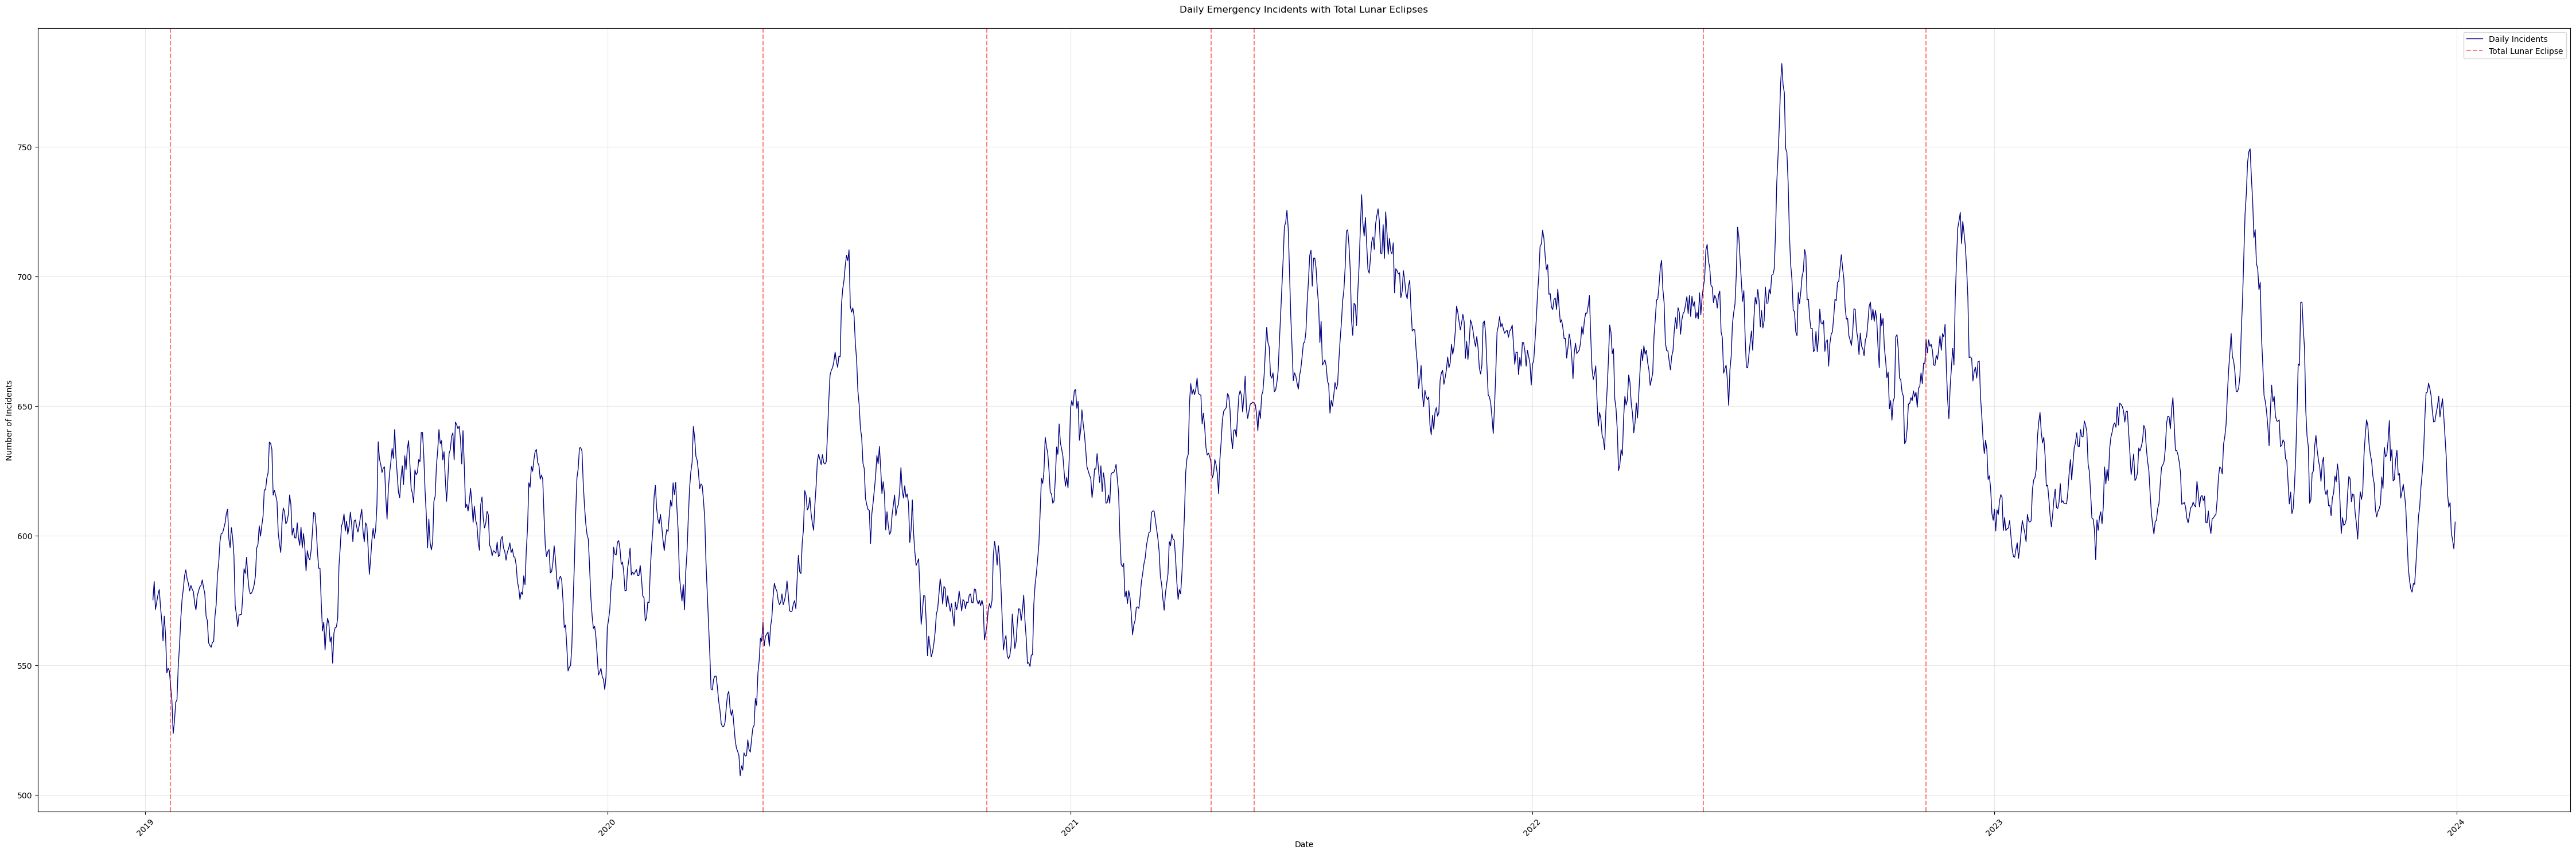

In [ ]:
# Create a figure and axis
plt.figure(figsize=(20, 8))

# Create the line plot for daily incidents
plt.plot(daily_accidents["REPORTED"], 
         daily_accidents["7-day-window"],
         linewidth=1,
         color='navy',
         label='Daily Incidents')

# Plot total lunar eclipses as vertical lines
for eclipse_date in total_eclipse_series['DateTime']:
    plt.axvline(x=eclipse_date.date(), 
                color='red', 
                linestyle='--', 
                alpha=0.5)

# Customize the plot
plt.title('Daily Emergency Incidents with Total Lunar Eclipses', pad=20)
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Add legend
plt.legend(['Daily Incidents', 'Total Lunar Eclipse'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for easier reading
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


In [37]:
# Convert daily_accidents to a DataFrame for easier analysis
daily_incidents_df = daily_accidents
daily_incidents_df.columns = ['date', 'incidents','7-day-average']

# Create a list of eclipse dates
eclipse_dates = [d.date() for d in total_eclipse_series['DateTime']]

# Create a mask for eclipse days
eclipse_mask = daily_incidents_df['date'].isin(eclipse_dates)

# Calculate averages
eclipse_day_avg = daily_incidents_df[eclipse_mask]['incidents'].mean()
# The ~ operator inverts/negates the boolean mask, so ~eclipse_mask means "not eclipse_mask"
# This gives us all days that are NOT eclipse days
non_eclipse_day_avg = daily_incidents_df[~eclipse_mask]['incidents'].mean()

print(f"Average incidents on total lunar eclipse days: {eclipse_day_avg:.2f}")
print(f"Average incidents on non-eclipse days: {non_eclipse_day_avg:.2f}")

percent_diff = ((eclipse_day_avg - non_eclipse_day_avg) / non_eclipse_day_avg) * 100
print(f"\nPercent difference: {percent_diff:.2f}%")



Average incidents on total lunar eclipse days: 614.29
Average incidents on non-eclipse days: 630.03

Percent difference: -2.50%


In [38]:
# Convert the DateTime to local time and extract the hour
total_eclipse_series['Hour'] = total_eclipse_series['DateTime'].dt.hour

# Create a list of eclipse dates and hours
eclipse_datetime_pairs = list(zip(total_eclipse_series['DateTime'].dt.date, 
                                total_eclipse_series['DateTime'].dt.hour))

# Get hourly incidents from emergency data
hourly_incidents = emergency_df.groupby([emergency_df['REPORTED'].dt.date, 
                                       emergency_df['REPORTED'].dt.hour])['INCIDENT'].count()

# Initialize lists to store incidents for eclipse hours and non-eclipse hours
eclipse_hour_incidents = []
non_eclipse_hour_incidents = []

# Categorize incidents
for (date, hour), count in hourly_incidents.items():
    if (date, hour) in eclipse_datetime_pairs:
        eclipse_hour_incidents.append(count)
    else:
        non_eclipse_hour_incidents.append(count)

# Calculate averages
eclipse_hour_avg = np.mean(eclipse_hour_incidents)
non_eclipse_hour_avg = np.mean(non_eclipse_hour_incidents)

print(f"\nAverage incidents during eclipse hours: {eclipse_hour_avg:.2f}")
print(f"Average incidents during non-eclipse hours: {non_eclipse_hour_avg:.2f}")

# Calculate percent difference between eclipse and non-eclipse hours
percent_diff = ((eclipse_hour_avg - non_eclipse_hour_avg) / non_eclipse_hour_avg) * 100

print(f"\nPercent difference: {percent_diff:.2f}%")





Average incidents during eclipse hours: 26.29
Average incidents during non-eclipse hours: 26.25

Percent difference: 0.14%
